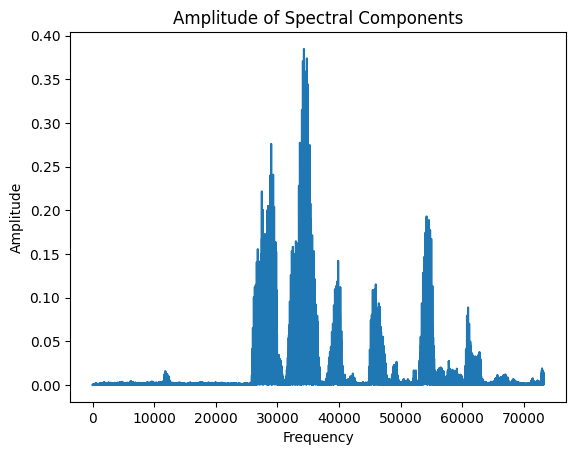

In [12]:
import librosa as lb
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import soundfile as sf

y, sr = lb.load("AI_SPEECH.wav")

# Perform FFT
speech_spectrum = np.fft.fft(y)

# Plot the amplitude part of the spectral components
plt.plot(np.abs(y))
plt.title('Amplitude of Spectral Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Inverse transform to time domain
time_domain_signal = np.fft.ifft(y)


In [13]:
def plot_waveform(y, sr,title):
    plt.figure(figsize=(10, 4))
    lb.display.waveshow(y, sr=sr, color='blue')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

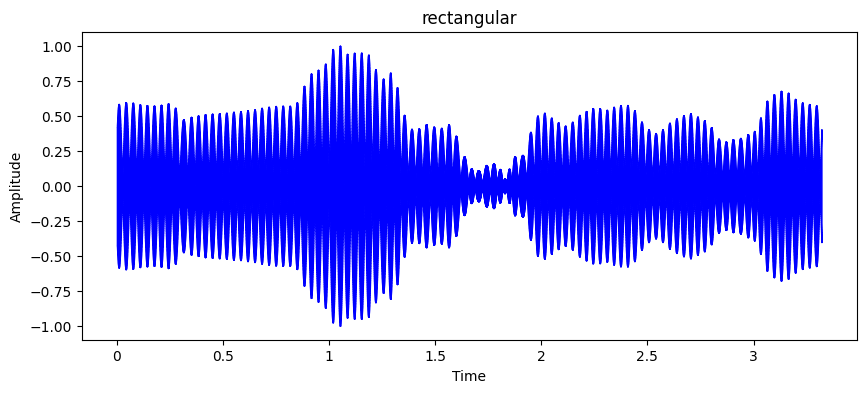

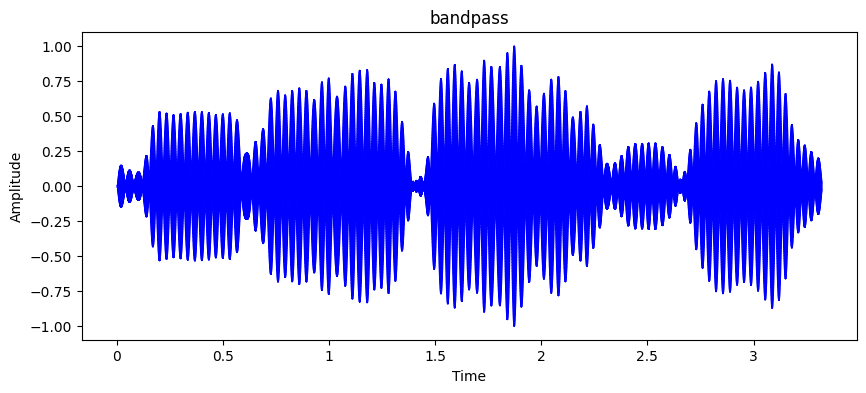

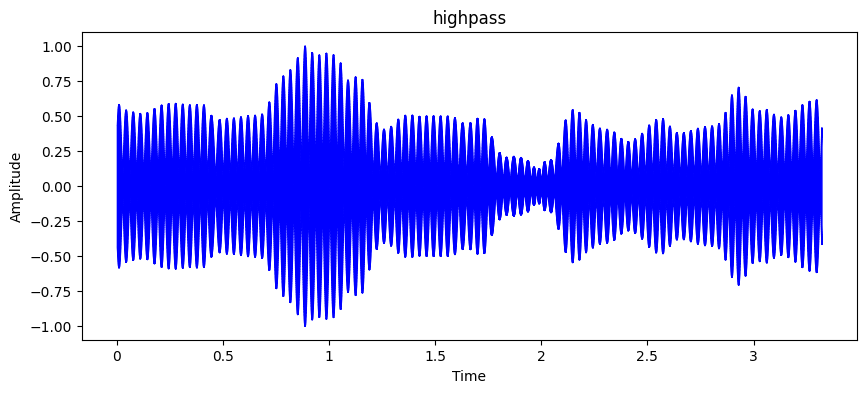

In [20]:
def apply_filter_and_listen(y, sr, filter_type):
    # FFT to transform speech signal to spectral domain
    D = np.fft.fft(y)

    # Define filter parameters based on filter type
    if filter_type == 'rectangular':
        # Rectangular filter
        cutoff = 2000  # Cutoff frequency in Hz
        order = 101    # Filter order (odd number to avoid Nyquist issue)
        b = signal.firwin(order, cutoff, fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'bandpass':
        # Bandpass filter
        lowcut = 1000   # Low cutoff frequency in Hz
        highcut = 4000  # High cutoff frequency in Hz
        order = 101     # Filter order (odd number to avoid Nyquist issue)
        b = signal.firwin(order, [lowcut, highcut], fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'highpass':
        # Highpass filter
        cutoff = 3000  # Cutoff frequency in Hz
        order = 100    # Filter order (even number)
        b = signal.firwin(order + 1, cutoff, fs=sr, pass_zero=False, scale=False)  # Increase order by 1

    # Adjust the length of the filter coefficients to match the length of the spectral components
    b_padded = np.pad(b, (0, len(D) - len(b)), mode='constant')

    # Apply filter to the spectrum
    D_filtered = D * b_padded

    # Inverse FFT to transform the filtered spectrum to time domain
    y_filtered = np.fft.ifft(D_filtered).real

    # Normalize the filtered signal to avoid clipping
    y_filtered /= np.max(np.abs(y_filtered))

    # Listen to the filtered sound
    plot_waveform(y_filtered,sr,filter_type)
    sf.write(f"{filter_type}_filtered.wav", y_filtered, sr)

filter_types = ['rectangular', 'bandpass', 'highpass']
for filter_type in filter_types:
    apply_filter_and_listen(y, sr, filter_type)

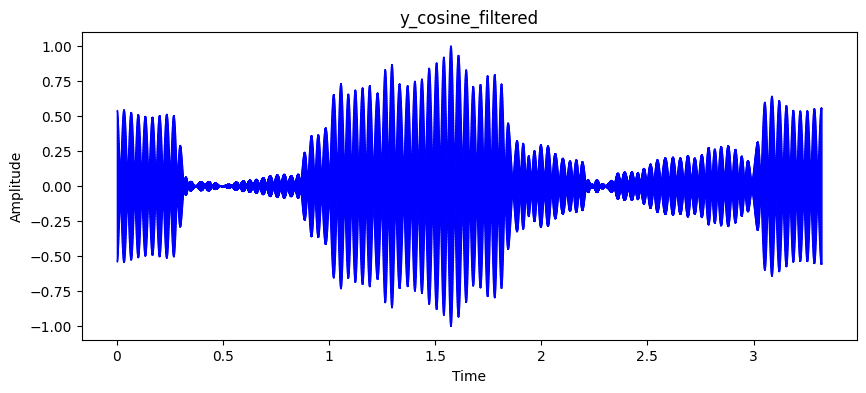

<ipython-input-19-41ac972e07ee>:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.gaussian(100, std=5)


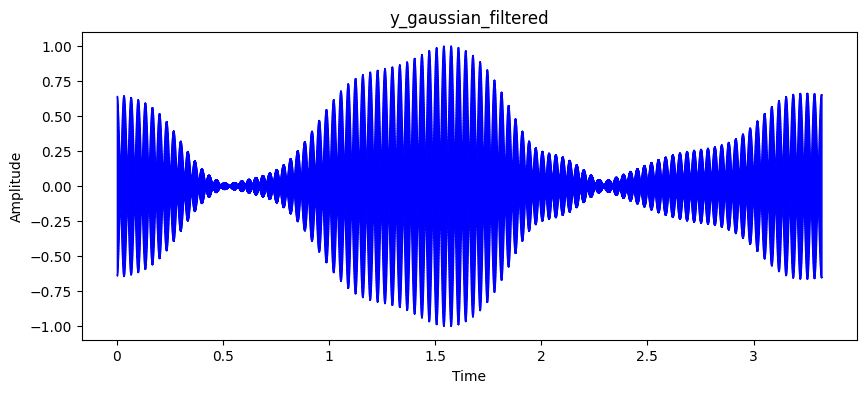

In [19]:
b_cos = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True, window='cosine')
b_cos_pad = np.pad(b_cos, (0, len(y) - len(b_cos)), mode='constant')
D_cos_filt = np.fft.fft(y) * b_cos_pad
y_cos_filt = np.fft.ifft(D_cos_filt).real
y_cos_filt /= np.max(np.abs(y_cos_filt))
plot_waveform(y_cos_filt,sr,'y_cosine_filtered')
sf.write("cosine_filtered.wav", y_cos_filt, sr)

window = signal.gaussian(100, std=5)
b_gaus = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True)
b_gaus *= window
b_gaus_pad = np.pad(b_gaus, (0, len(y) - len(b_gaus)), mode='constant')
D_gaus_filt = np.fft.fft(y) * b_gaus_pad
y_gaus_filt = np.fft.ifft(D_gaus_filt).real
y_gaus_filt /= np.max(np.abs(y_gaus_filt))
plot_waveform(y_gaus_filt,sr,"y_gaussian_filtered")
sf.write("gaussian_filtered.wav", y_gaus_filt, sr)